In [1]:
import pandas as pd

from nltk.tokenize import word_tokenize
import multiprocessing
import gensim
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

from textblob import TextBlob

In [2]:
df=pd.read_csv('../Data_Prep/AVENCensus2016_data.csv')
# df=df.drop(['Unnamed: 0'],1)
df.head(2)

,timestamp,year,month,education,student,religion,religionOther,raceDesc,nationality,USRegion,...,notPartNaN,notPartNervous,notPartNoLocal,notPartNotInt,notPartRacism,notPartSocAnxiety,notPartNotAccDisab,notPartUnfriendToLGBTQ,notPartUnfriendToGreyDemi,notPartElitistNonAces
0,2016-10-23 18:57:01,1995.0,July,Some college (no degree yet),"Yes, in an undergraduate program",Agnostic,NaN,White,United States of America,Florida,...,0,0,1,1,0,0,0,0,1,0
1,2016-10-23 19:35:35,1998.0,September,Less than high school,"Yes, in high school",Roman Catholic,NaN,White American,United Kingdom,NaN,...,0,1,0,0,0,0,0,0,0,0


In [3]:
def processing(data, col_num):
#     data = data.dropna(subset=[data.columns[col_num]])
    data = data.dropna(subset=[col_num])
    data = data.ix[:,col_num]
#     data2 = data
    data.tolist()
    data = [x.lower() for x in data]
    return data

In [4]:
discrim = processing(df, 'discrimLong')

In [5]:
tb_discrim = [TextBlob(x) for x in discrim]

In [6]:
tb_discrim[5].word_counts.items()

dict_items([('coworkers', 1), ('been', 1), ('up', 1), ('hook', 1), ('be', 1), ('me', 1), ('alone', 1), ('work', 1), ('to', 2), ('wants', 1), ('trying', 1), ('no', 1), ('because', 1), ('one', 1), ('have', 1), ('at', 1)])

test = []
for i in tb_discrim:
    for word, count in i.word_counts.items():
        joined = zip(word,count)
        test.append(joined)
#         print("%15s %i" % (word, count))

In [7]:
long_answers = ["feedback", "outResponceLong", "discrimLong", "aceSupportLong",  "allySupportLong","questions", "stories" ]

all_long = []
for i in long_answers:
    all_long += processing(df,i)

In [8]:
all_long

['i enjoyed participating.',
 'more options for disabled individuals ',
 'thorough!',
 'in the country list portugal has a mistake, it\'s written as "portugual". other than that, nothing :)',
 'this is very well done. i feel i as adequately able to express myself through the answer options.',
 'happy asexual awareness week!!!',
 "i don't understand why pansexuality and polyamory are grouped together. i am panromantic, and would be open to a polyamorous relationship, but i do not think they are the same. ",
 'thank you for what you are doing! this is very important! (maybe more questions about our identity before identifying as ace/ in the ace spectrum would be interesting. ',
 'awesome!',
 "it was fine except you can't uncheck boxes so like i messed up on a few trans/nb questions (i'm cis) but i can't uncheck them so it's gonna mess up your results",
 'in one of the initial questions about how you originally identified, i had to answer asexual because i have always in a way identified 

In [9]:
toke_discrim = [word_tokenize(x) for x in all_long]

In [10]:
num_features = 100
context_size = 5 #how mnay words in a window
min_word_count = 3
num_workers = multiprocessing.cpu_count()


AliIsAwesome = gensim.models.Word2Vec(
    toke_discrim,
    size = num_features,
    window = context_size,
    min_count = min_word_count,
    workers = num_workers,
    sg =1, #use skip grams instead of cbow
    seed=1)



In [11]:
AliIsAwesome.most_similar('romance')

[('engage', 0.7729628086090088),
 ('zero', 0.7653590440750122),
 ('intimate', 0.7528518438339233),
 ('masturbation', 0.7525907754898071),
 ('uninterested', 0.7508111000061035),
 ('obsessed', 0.7465271949768066),
 ('liking', 0.7462009191513062),
 ('frustration', 0.7459721565246582),
 ('marriage', 0.7448274493217468),
 ('healthy', 0.7392057180404663)]

In [12]:
goes_next = AliIsAwesome.syn0

In [13]:
# pca_matrix = PCA(n_components = 50, random_state=0).fit_transform(throns2vc.syn0)

In [14]:
tsne_mat = TSNE(n_components=2, random_state=0).fit_transform(goes_next)

In [15]:
[c[0] for c in AliIsAwesome.most_similar('romance')]

['engage',
 'zero',
 'intimate',
 'masturbation',
 'uninterested',
 'obsessed',
 'liking',
 'frustration',
 'marriage',
 'healthy']

In [16]:
# AliIsAwesome['ace']

In [17]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, tsne_mat[AliIsAwesome.vocab[word].index])
            for word in AliIsAwesome.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

points.plot.scatter("x", "y", s=10, figsize=(20, 12))

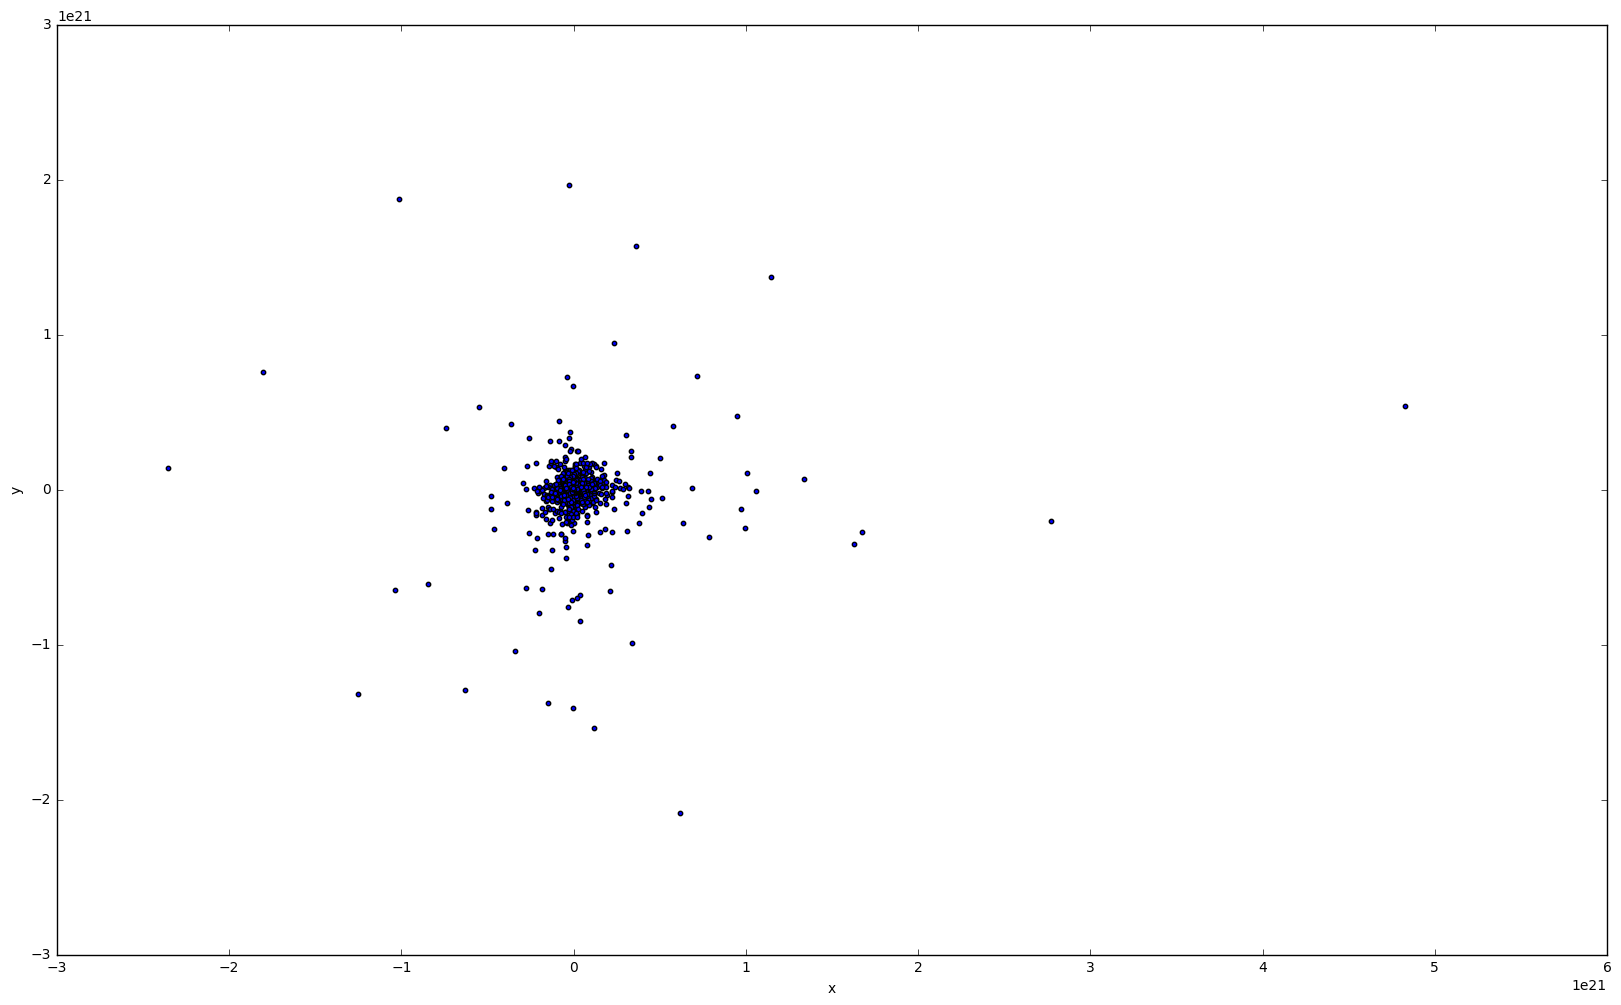

In [18]:
plt.show()

In [19]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

In [20]:
points[points['word']=='asexual']

,word,x,y
2618,asexual,-2.575907e+19,2.946020e+19


In [21]:
plot_region(x_bounds=(-6.50e+19,-2.50e+19), y_bounds=(0.50e+18,4.50e+18))

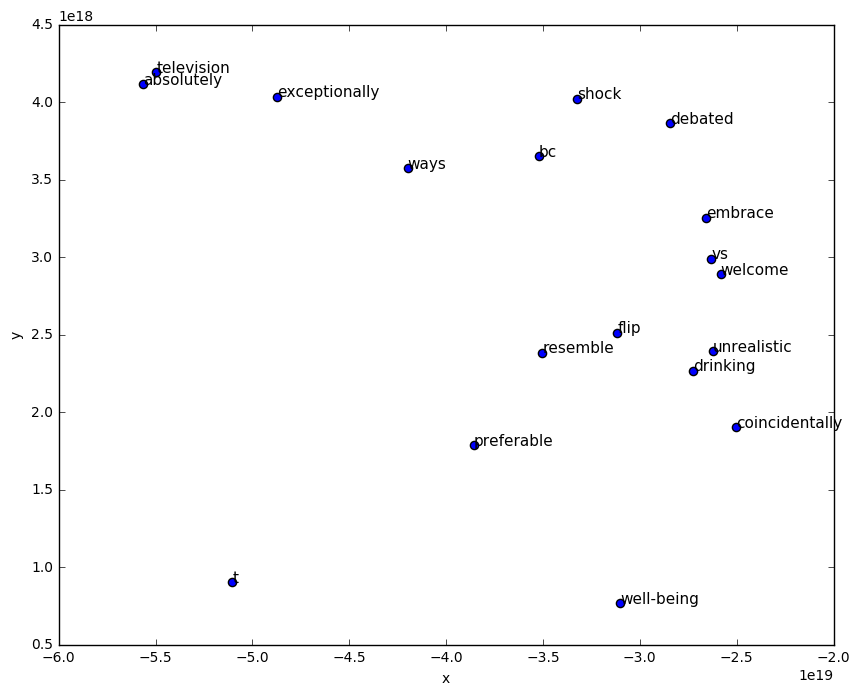

In [22]:
plt.show()

## Support from Ace Community
aceSupportLong

In [23]:
import flask

# Initialize the app
app = flask.Flask(__name__)

#loads the page
@app.route("/")
def viz_page():
    with open("flask_index.html", 'r') as viz_file:
        return viz_file.read()
    
#listens
@app.route("/gof", methods=["POST"])
def score():
    """
    When A POST request with json data is made to this url,
    Read the grid from the json, update and send it back
    """
    #html "posts" a request and python gets the json  from that request 
    data = flask.request.json
    a = data['grid']
    d = [c[0] for c in AliIsAwesome.most_similar(a)]
#     d = ["real","this","tried"]
    return flask.jsonify({'words': d})

In [24]:
app.run(host='10.0.1.8', port=5000)

 * Running on http://10.0.1.8:5000/ (Press CTRL+C to quit)
10.0.1.8 - - [05/Mar/2017 15:27:46] "GET / HTTP/1.1" 200 -
10.0.1.8 - - [05/Mar/2017 15:27:46] "GET /favicon.ico HTTP/1.1" 404 -
10.0.1.8 - - [05/Mar/2017 15:27:52] "POST /gof HTTP/1.1" 200 -
10.0.1.8 - - [05/Mar/2017 15:27:56] "POST /gof HTTP/1.1" 200 -
10.0.1.8 - - [05/Mar/2017 15:28:07] "POST /gof HTTP/1.1" 200 -
